In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import accuracy_score

加载数据

In [41]:
def load_data():
    data = np.loadtxt("data.txt",delimiter= ",")
    data = np.array(data)
    n = data.shape[1]-1#特征数量
    X = data[:, :n]
    y = data[:,-1].reshape(-1,1)
    return X, y

画散点图

In [42]:
def plot_data(X, y):
    pos = np.where(y==1)
    neg = np.where(y==0)
    plt.scatter(X[pos,0], X[pos,1], marker="x")
    plt.scatter(X[neg,0], X[neg,1], marker="o")
    plt.xlabel("Exam 1")
    plt.ylabel("Exam 2")
    plt.show()
    plt.show()

[[ 54.96714153  52.0039428 ]
 [ 48.61735699  52.77158568]
 [ 56.47688538  44.55980223]
 [ 65.23029856  51.85802958]
 [ 47.65846625  52.34457979]
 [ 47.65863043  44.28518866]
 [ 65.79212816  64.92619609]
 [ 57.67434729  53.79066337]
 [ 45.30525614  40.46957202]
 [ 55.42560044  55.25242887]
 [ 45.36582307  42.20254664]
 [ 45.34270246  56.29667683]
 [ 52.41962272  59.26876463]
 [ 30.86719755  43.43454145]
 [ 32.75082167  57.70700903]
 [ 44.37712471  53.30224742]
 [ 39.8716888   56.57648128]
 [ 53.14247333  65.17434386]
 [ 40.91975924  48.03689507]
 [ 35.87696299  43.97011069]
 [ 64.65648769  42.88388456]
 [ 47.742237    43.47351772]
 [ 50.67528205  49.38318632]
 [ 35.75251814  52.7292158 ]
 [ 44.55617275  52.21352639]
 [ 51.1092259   56.61746599]
 [ 38.49006423  50.10401514]
 [ 53.75698018  61.62827262]
 [ 43.9936131   47.88274533]
 [ 47.0830625   71.76135333]
 [ 43.98293388  55.00533878]
 [ 68.52278185  43.14273955]
 [ 49.86502775  41.43286002]
 [ 39.42289071  53.85977932]
 [ 58.22544912

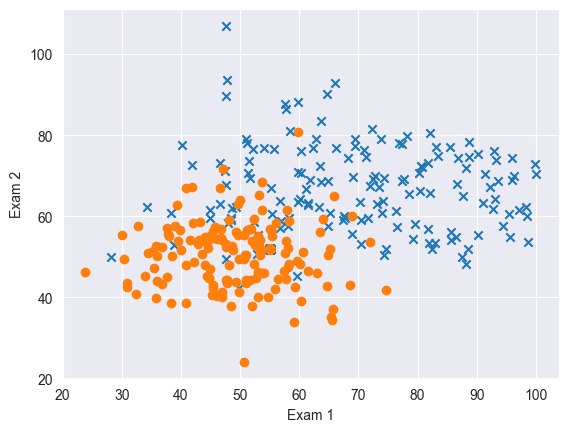

In [43]:
X,y = load_data()
print(X, y)
plot_data(X,y)


# 实现sigmoid函数

In [44]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
sigmoid(3)
sigmoid(np.array([1,2,3]))

array([0.73105858, 0.88079708, 0.95257413])

# 实现假设函数

In [45]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

# 实现损失函数

In [46]:
def cost_function(X, y, theta,lambd):
    m = X.shape[0]
    h = hypothesis(X, theta)
    J = -1/m * np.sum(y*np.log(h) + (1-y)*np.log(1-h))+(lambd/2/m)+np.sum(theta**2)/m
    return J

# 预测函数

In [47]:
def predict(X, theta):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    h = hypothesis(X, theta)
    return np.where(h >= 0.5, 1, 0)

# 实现梯度下降

In [48]:
def gradient_descent(X, y, theta, alpha, num_iters, lambd):
    m = X.shape[0]
    X= np.hstack((np.ones((m,1)),X))
    # 初始化损失列表
    for i in range(num_iters):
        for j in range(X.shape[1]):
            theta[j] = theta[j] - alpha/m * np.sum((hypothesis(X, theta) - y)*X[:,j].reshape(-1,1)+lambd*theta[j]/m)

        if(i%1000 == 0):
            print("迭代次数：",i,"损失值：",cost_function(X,y,theta,lambd))

    return theta

In [49]:
X,y = load_data()
n = X.shape[1]
theta = np.zeros(n+1).reshape(n+1,1)
theta = gradient_descent(X,y,theta,0.01,100000,0.001)
print("theta:",theta)

迭代次数： 0 损失值： 5.586497193402337
迭代次数： 1000 损失值： 3.357190213507315
迭代次数： 2000 损失值： 3.0531755263165636
迭代次数： 3000 损失值： 3.016090853177758
迭代次数： 4000 损失值： 2.9734736924346468
迭代次数： 5000 损失值： 0.954906701083893
迭代次数： 6000 损失值： 2.0761484462502415
迭代次数： 7000 损失值： 2.657524797636732
迭代次数： 8000 损失值： 5.320121299854255
迭代次数： 9000 损失值： nan
迭代次数： 10000 损失值： 3.4189614651277145
迭代次数： 11000 损失值： 1.2071107490432693
迭代次数： 12000 损失值： 2.699019249238922
迭代次数： 13000 损失值： 2.05127989564058
迭代次数： 14000 损失值： 1.6618212827854189
迭代次数： 15000 损失值： 2.4189632192896537


/var/folders/f0/6w3z6qy11fj72gycgls4kq6r0000gn/T/ipykernel_8830/4006297678.py:4: RuntimeWarning: divide by zero encountered in log
  J = -1/m * np.sum(y*np.log(h) + (1-y)*np.log(1-h))+(lambd/2/m)+np.sum(theta**2)/m
/var/folders/f0/6w3z6qy11fj72gycgls4kq6r0000gn/T/ipykernel_8830/4006297678.py:4: RuntimeWarning: invalid value encountered in multiply
  J = -1/m * np.sum(y*np.log(h) + (1-y)*np.log(1-h))+(lambd/2/m)+np.sum(theta**2)/m


迭代次数： 16000 损失值： 2.401985051399992
迭代次数： 17000 损失值： 2.2043870131083425
迭代次数： 18000 损失值： 4.678001767196032
迭代次数： 19000 损失值： 2.147911604346504
迭代次数： 20000 损失值： 2.310241563578362
迭代次数： 21000 损失值： 2.238586682516596
迭代次数： 22000 损失值： 1.5359621543743045
迭代次数： 23000 损失值： 2.334778292253783
迭代次数： 24000 损失值： 3.390904817566922
迭代次数： 25000 损失值： 2.826510579416108
迭代次数： 26000 损失值： 2.4380003859140076
迭代次数： 27000 损失值： 3.4307747172961642
迭代次数： 28000 损失值： 2.820959850837661
迭代次数： 29000 损失值： 2.9659596626872347
迭代次数： 30000 损失值： 2.9715055271564195
迭代次数： 31000 损失值： nan
迭代次数： 32000 损失值： 2.6611588720145134
迭代次数： 33000 损失值： 2.9963420278253308
迭代次数： 34000 损失值： 2.674797848203896
迭代次数： 35000 损失值： 3.037770531067678
迭代次数： 36000 损失值： 2.722956337127771
迭代次数： 37000 损失值： 3.7770084584642563
迭代次数： 38000 损失值： 3.1022988580907063
迭代次数： 39000 损失值： 2.800901615031676
迭代次数： 40000 损失值： 2.753506925838586
迭代次数： 41000 损失值： 3.387113943672999
迭代次数： 42000 损失值： 2.867639447712369
迭代次数： 43000 损失值： 2.9887825978581364
迭代次数： 44000 损失值： 2.7992

# 画出决策边界

In [50]:
def plot_decision_boundary(X, y, theta):
    cm_dark = mpl.colors.ListedColormap(['#FF8080', '#00FFFF'])
    plt.scatter(X[:,0], X[:,1], c=np.array(y).squeeze(), s=10, cmap=cm_dark)

    x1 = np.arange(min(X[:,0]),max(X[:,0]), 0.01)
    x2 = -(theta[0] + theta[1]*x1)/theta[2]
    plt.plot(x1, x2)
    plt.show()

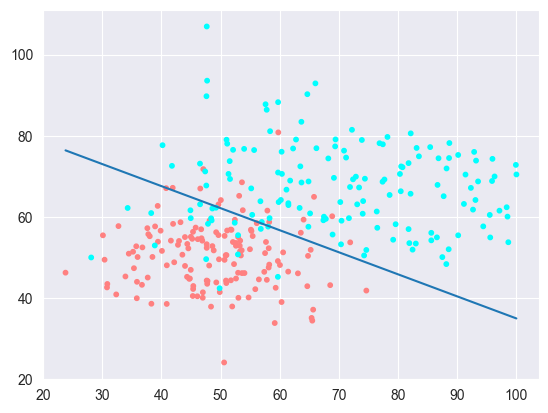

In [51]:
plot_decision_boundary(X, y, theta)

In [52]:
p = predict(X, theta)
print('准确率：%f',accuracy_score(y, p))

准确率：%f 0.88
